In [1]:
import numpy as np
import pandas as pd

In [2]:
np.median([1,2,3,4])

2.5

In [3]:
np.mean([1,2,3])

2.0

In [4]:
np.random.randint(1,10)

7

* https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html
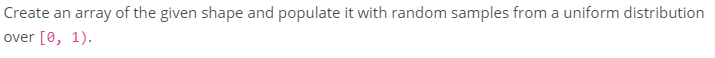

In [5]:
np.random.rand()

0.03342655010998441

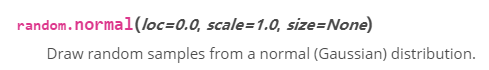

In [6]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
len(s)

1000

* https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html

In [7]:
n, p = 10, .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 1000)
# result of flipping a coin 10 times, tested 1000 times.
len(s)

1000

* https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html
* Return a sample (or samples) from the “standard normal” distribution.

In [8]:
np.random.randn()

-0.016247174692687733

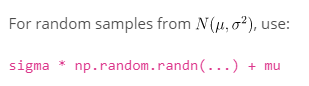

In [9]:
3 + 2.5 * np.random.randn(2, 4)

array([[1.6468422 , 0.44115379, 0.51291645, 2.87693886],
       [1.85700368, 1.15221341, 1.8932224 , 3.04374691]])

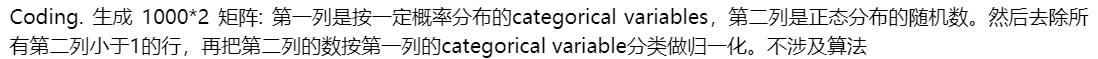

In [10]:
data={
 'a':np.random.binomial(1,0.2,1000),
 'b':np.random.normal(0,1,1000)
}
# Or use np.random.choice(3,10,[0.1,0.2,0.7])
df=pd.DataFrame(data=data)
df=df[df.b>=1].reset_index(drop=True)
df.shape

(141, 2)

In [11]:
# Normalization: rescale to range of [0,1]
df.groupby('a').transform(lambda x: (x-x.min())/(x.max()-x.min()))
df.head(3)

,a,b
0,1,1.427263
1,0,1.094585
2,0,2.134862


In [12]:
# Standardization: rescale to have mean=0 and std=1
df.groupby('a').transform(lambda x: (x-x.mean())/x.std())
df.head()

,a,b
0,1,1.427263
1,0,1.094585
2,0,2.134862
3,1,1.586990
4,0,1.827973


* Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

* Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

* However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.


### Possion distribution
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html
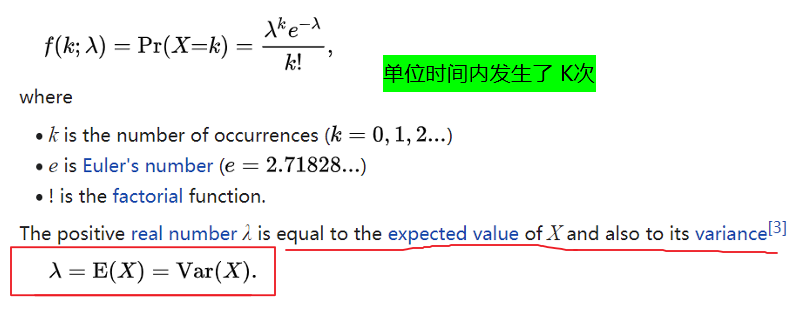

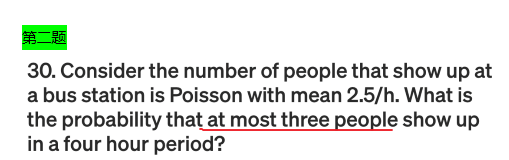

In [14]:
from scipy.stats import poisson

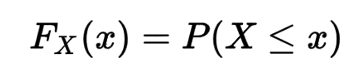

In [20]:
E_x = 2.5*4 # expected 2.5 in one hour, 4 hour is 10

# use CDF as above find P(X <= 3)
poisson.cdf(x, E_x)

0.010336050675925726

## Calculate percentile
* https://www.delftstack.com/howto/python/python-percentile/

#### Calculate Percentile in Python Using the NumPy Package

In [1]:
import numpy as np

arry = np.array([4,6,8,10,12])

percentile = np.percentile(arry, 50)

print("The percentile is:",percentile)

The percentile is: 8.0


#### Calculate Percentile in Python Using the math Package
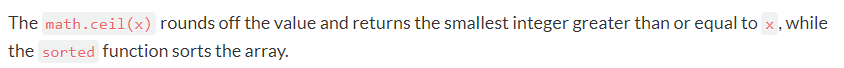

#### greater than 25% of other

In [25]:
import math

arry=[1,2,3,4,5,6,7,8,9,10]

def calculate_percentile(arry, percentile):
    size = len(arry)
    return sorted(arry)[int(math.ceil((size * percentile) / 100)) - 1]

percentile_25 = calculate_percentile(arry, 25)
percentile_50 = calculate_percentile(arry, 50)
percentile_75 = calculate_percentile(arry, 75)

print("The 25th percentile is:",percentile_25)
print("The 50th percentile is:",percentile_50)
print("The 75th percentile is:",percentile_75)

The 25th percentile is: 3
The 50th percentile is: 5
The 75th percentile is: 8


In [29]:
import math

arry=[1,2,3,4,5,6,7,8,9,10]

def calculate_percentile(array, percentile):
    X = sorted(array)
    N = len(X)

    k = (N-1) * percentile / 100 # N 个数 N-1 等分
    f = math.floor(k)
    c = math.ceil(k)
    print(N, percentile, '   ', ' k is:',  k, ' f is:', f, ' c is:', c, '   ', c-k, k-f)
    
    if f == c:
        return X[int(k)]
    
    # X[f] ....value ....X[c]
    d0 = (X[f]) * (c-k) # c-k is weight for 
    d1 = (X[c]) * (k-f)
    return d0+d1

percentile_25 = calculate_percentile(arry, 25)
percentile_50 = calculate_percentile(arry, 50)
percentile_75 = calculate_percentile(arry, 75)

print("The 25th percentile is: {0} vs {1}".format(percentile_25, np.percentile(arry, 25)))
print("The 50th percentile is: {0} vs {1}".format(percentile_50, np.percentile(arry, 50)))
print("The 75th percentile is: {0} vs {1}".format(percentile_75, np.percentile(arry, 75)))

10 25      k is: 2.25  f is: 2  c is: 3     0.75 0.25
10 50      k is: 4.5  f is: 4  c is: 5     0.5 0.5
10 75      k is: 6.75  f is: 6  c is: 7     0.25 0.75
The 25th percentile is: 3.25 vs 3.25
The 50th percentile is: 5.5 vs 5.5
The 75th percentile is: 7.75 vs 7.75
